# Libraries

In [1]:
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
import matplotlib.pyplot as plt
from termcolor import colored

# Importing data

In [2]:
B04=pd.read_csv(r"C:\Users\preci\B04.csv")
B04_vs=pd.read_csv(r"C:\Users\preci\B04_vs.csv")

# Editing data

In [3]:
B04=B04.drop(columns='Unnamed: 0')
B04.columns

Index(['match_id', 'minute', 'pass_goal_assist', 'pass_height', 'pass_length',
       'pass_recipient', 'pass_technique', 'play_pattern', 'player',
       'position', 'possession_team', 'second', 'shot_outcome', 'type',
       'location_y_x', 'location_y_y', 'carry_end_location_x',
       'carry_end_location_y', 'shot_end_location_x', 'shot_end_location_y',
       'pass_end_location_x', 'pass_end_location_y'],
      dtype='object')

### Making goal id column

In [4]:
B04['goal_id']=''
B04.loc[B04['shot_outcome']=='Goal','goal_id']='Player-'+B04['player']+' | Time-'+'['+B04['minute'].astype(str)+':'+B04['second'].astype(str)+']'


### Opponent teams

In [5]:
list_of_teams=list(B04_vs['possession_team'].unique())
list_of_teams

['Werder Bremen',
 'Union Berlin',
 'Eintracht Frankfurt',
 'Bochum',
 'Augsburg',
 'Hoffenheim',
 'Darmstadt 98',
 'FSV Mainz 05',
 'Wolfsburg',
 'Freiburg',
 'FC Köln',
 'Bayern Munich',
 'FC Heidenheim',
 'VfB Stuttgart',
 'Borussia Dortmund',
 'Borussia Mönchengladbach',
 'RB Leipzig']

# Select match and goal to visualize 

In [6]:
match_id=int(input('Enter the match id:'))
id_df=B04[B04['match_id']==match_id]
id_df=id_df.sort_values(by=['minute', 'second'], ascending=True).reset_index(drop=True)
goal_id=list(B04['goal_id'][(B04['match_id']==match_id)&(B04['shot_outcome']=='Goal')])
goal_id


Enter the match id: 3895302


['Player-Granit Xhaka | Time-[59:18]',
 'Player-Florian Wirtz | Time-[67:25]',
 'Player-Florian Wirtz | Time-[82:29]',
 'Player-Florian Wirtz | Time-[89:25]']

In [7]:
#For example we select the 4th goal 'Player-Florian Wirtz | Time-[89:25]'
selected_goal_id=goal_id[3]
action_df=id_df[id_df['goal_id']==selected_goal_id]
action_df

,match_id,minute,pass_goal_assist,pass_height,pass_length,pass_recipient,pass_technique,play_pattern,player,position,...,type,location_y_x,location_y_y,carry_end_location_x,carry_end_location_y,shot_end_location_x,shot_end_location_y,pass_end_location_x,pass_end_location_y,goal_id
1980,3895302,89,NaN,NaN,NaN,NaN,NaN,From Counter,Florian Wirtz,Left Attacking Midfield,...,Shot,106.4,48.8,NaN,NaN,120.0,37.7,NaN,NaN,Player-Florian Wirtz | Time-[89:25]


## Build up data frame

In [8]:
# Get the index of the row with the selected goal ID
index_of_selected_goal = action_df.index[0]
index_of_selected_goal
# Calculate the starting index for selecting 20 rows above
start_index = max(index_of_selected_goal - 20, 0)

# Select 20 rows above the row with the selected goal ID
build_up_df = id_df.loc[start_index:index_of_selected_goal]
build_up_df=build_up_df[build_up_df['type']!='Pressure']
build_up_df[['minute','second','player','type','location_y_x','location_y_y',
            'carry_end_location_x','carry_end_location_y','shot_end_location_x',
            'shot_end_location_y','pass_end_location_x','pass_end_location_y','goal_id']]

,minute,second,player,type,location_y_x,location_y_y,carry_end_location_x,carry_end_location_y,shot_end_location_x,shot_end_location_y,pass_end_location_x,pass_end_location_y,goal_id
1960,88,31,Odilon Kossonou,Pass,44.1,48.4,NaN,NaN,NaN,NaN,50.4,63.0,
1961,88,32,Jonas Hofmann,Ball Receipt*,50.4,63.0,NaN,NaN,NaN,NaN,NaN,NaN,
1962,88,32,Jonas Hofmann,Carry,50.4,63.0,52.9,62.7,NaN,NaN,NaN,NaN,
1963,88,35,Jonas Hofmann,Pass,52.9,62.7,NaN,NaN,NaN,NaN,48.3,39.6,
1964,88,36,Exequiel Alejandro Palacios,Ball Receipt*,48.3,39.6,NaN,NaN,NaN,NaN,NaN,NaN,
1965,88,52,Jonathan Tah,Pass,52.2,45.4,NaN,NaN,NaN,NaN,64.4,74.2,
1966,88,53,Jonas Hofmann,Ball Receipt*,64.4,74.2,NaN,NaN,NaN,NaN,NaN,NaN,
1967,88,53,Jonas Hofmann,Carry,64.4,74.2,63.4,74.2,NaN,NaN,NaN,NaN,
1968,88,55,Jonas Hofmann,Pass,63.4,74.2,NaN,NaN,NaN,NaN,49.4,63.4,
1969,88,56,Odilon Kossonou,Ball Receipt*,49.4,63.4,NaN,NaN,NaN,NaN,NaN,NaN,


# Visualisation of selected goal 

In [21]:
text=build_up_df[build_up_df['goal_id']!='']['goal_id'].values
print(f"Build up play of goal {text[0]}")

Build up play of goal Player-Florian Wirtz | Time-[89:25]


1)Odilon Kossonou passed the ball
2)Jonas Hofmann received the ball
3)Jonas Hofmann carried the ball
4)Jonas Hofmann passed the ball
5)Exequiel Alejandro Palacios received the ball
6)Jonathan Tah passed the ball
7)Jonas Hofmann received the ball
8)Jonas Hofmann carried the ball
9)Jonas Hofmann passed the ball
10)Odilon Kossonou received the ball
11)Odilon Kossonou carried the ball
12)Odilon Kossonou passed the ball
13)Jonas Hofmann received the ball
14)Jonas Hofmann carried the ball
15)Exequiel Alejandro Palacios did somthing
16)Alejandro Grimaldo García did somthing
17)Alejandro Grimaldo García recovered the ball
18)Alejandro Grimaldo García carried the ball
19)Florian Wirtz scored the goal


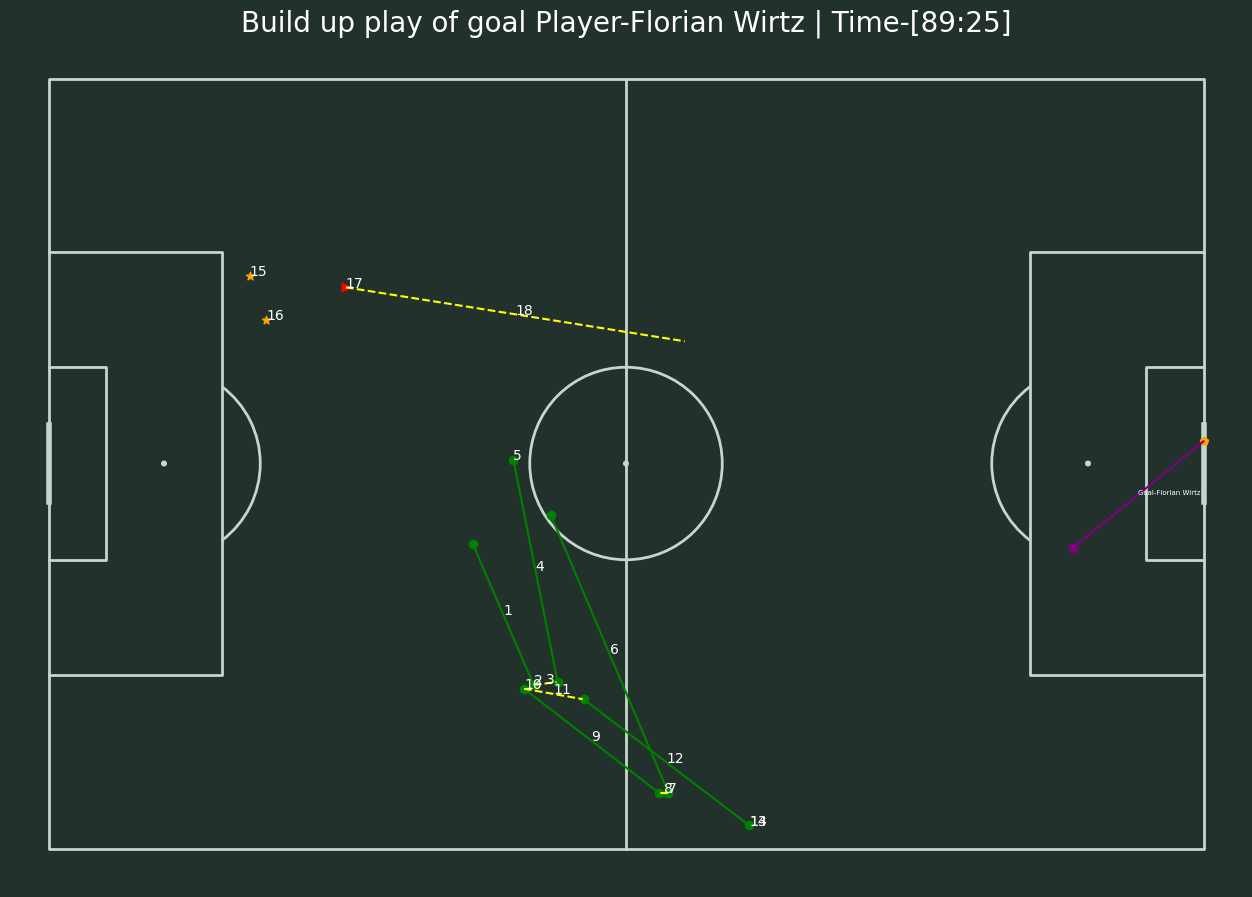

In [22]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
plt.title(f"Build up play of goal {text[0]}",color='White',fontsize=20)
for i in range(len(build_up_df)):
    if build_up_df.iloc[i]['type']=='Carry':
         plt.plot((build_up_df.iloc[i]['location_y_x'],build_up_df.iloc[i]['carry_end_location_x']),
                  (build_up_df.iloc[i]['location_y_y'],build_up_df.iloc[i]['carry_end_location_y']),
                  color='yellow',linestyle='--')
         
         mid_x=(build_up_df.iloc[i]['location_y_x']+build_up_df.iloc[i]['carry_end_location_x'])/2
         mid_y=(build_up_df.iloc[i]['location_y_y']+build_up_df.iloc[i]['carry_end_location_y'])/2
         plt.text(mid_x, mid_y,f'{i+1}',color='white',fontsize=10)
         print(f"{i+1}){build_up_df.iloc[i]['player']} carried the ball")
    
    elif build_up_df.iloc[i]['type']=='Pass':
        plt.plot((build_up_df.iloc[i]['location_y_x'],build_up_df.iloc[i]['pass_end_location_x']),
                  (build_up_df.iloc[i]['location_y_y'],build_up_df.iloc[i]['pass_end_location_y']),
                  color='green')        
        mid_x=(build_up_df.iloc[i]['location_y_x']+build_up_df.iloc[i]['pass_end_location_x'])/2
        mid_y=(build_up_df.iloc[i]['location_y_y']+build_up_df.iloc[i]['pass_end_location_y'])/2
        plt.text(mid_x, mid_y,f'{i+1}',color='white',fontsize=10)
        plt.scatter(build_up_df.iloc[i]['location_y_x'],build_up_df.iloc[i]['location_y_y'],color='green',marker='o')
        print(f"{i+1}){build_up_df.iloc[i]['player']} passed the ball")
        if build_up_df.iloc[i+1]['type']!='Ball Receipt*':
          plt.scatter(build_up_df.iloc[i]['pass_end_location_x'],build_up_df.iloc[i]['pass_end_location_y'],color='red',marker='x')  
          print(colored("but the pass was unsuccessful",'red'))

    elif build_up_df.iloc[i]['type']=='Shot':
        if build_up_df.iloc[i]['shot_outcome']=='Goal':            
            plt.plot((build_up_df.iloc[i]['location_y_x'],build_up_df.iloc[i]['shot_end_location_x']),
                  (build_up_df.iloc[i]['location_y_y'],build_up_df.iloc[i]['shot_end_location_y']),
                  color='purple')
            plt.scatter(build_up_df.iloc[i]['location_y_x'], build_up_df.iloc[i]['location_y_y'], color='purple',marker='o')
            mid_x=(build_up_df.iloc[i]['location_y_x']+build_up_df.iloc[i]['shot_end_location_x'])/2
            mid_y=(build_up_df.iloc[i]['location_y_y']+build_up_df.iloc[i]['shot_end_location_y'])/2
            plt.text(mid_x, mid_y,f"Goal-{build_up_df.iloc[i]['player']}",color='white',fontsize=5)
            plt.scatter(build_up_df.iloc[i]['shot_end_location_x'], build_up_df.iloc[i]['shot_end_location_y'], color='orange',marker='p')
            print(f"{i+1}){build_up_df.iloc[i]['player']} scored the goal")
            
        else:
            plt.plot((build_up_df.iloc[i]['location_y_x'],build_up_df.iloc[i]['shot_end_location_x']),
                  (build_up_df.iloc[i]['location_y_y'],build_up_df.iloc[i]['shot_end_location_y']),
                  color='purple')
            plt.scatter(build_up_df.iloc[i]['location_y_x'], build_up_df.iloc[i]['location_y_y'], color='purple',marker='o')
            mid_x=(build_up_df.iloc[i]['location_y_x']+build_up_df.iloc[i]['shot_end_location_x'])/2
            mid_y=(build_up_df.iloc[i]['location_y_y']+build_up_df.iloc[i]['shot_end_location_y'])/2
            plt.text(mid_x, mid_y,f'{i+1}',color='white',fontsize=10)    
            print(f"{i+1}){build_up_df.iloc[i]['player']} missed the goal")
    elif build_up_df.iloc[i]['type']=='Ball Receipt*':
        plt.scatter(build_up_df.iloc[i]['location_y_x'], build_up_df.iloc[i]['location_y_y'], color='green')
        plt.text(build_up_df.iloc[i]['location_y_x'], build_up_df.iloc[i]['location_y_y'],f'{i+1}',color='white',fontsize=10)
        print(f"{i+1}){build_up_df.iloc[i]['player']} received the ball")
    elif build_up_df.iloc[i]['type']=='Ball Recovery':
        plt.scatter(build_up_df.iloc[i]['location_y_x'], build_up_df.iloc[i]['location_y_y'], color='red',marker='>')
        plt.text(build_up_df.iloc[i]['location_y_x'], build_up_df.iloc[i]['location_y_y'],f'{i+1}',color='white',fontsize=10)
        print(f"{i+1}){build_up_df.iloc[i]['player']} recovered the ball")
    elif build_up_df.iloc[i]['type']=='Dispossessed':
        plt.scatter(build_up_df.iloc[i]['location_y_x'], build_up_df.iloc[i]['location_y_y'], color='red',marker='X')
        plt.text(build_up_df.iloc[i]['location_y_x'], build_up_df.iloc[i]['location_y_y'],f'{i+1}',color='white',fontsize=10)
        print(f"{i+1}){build_up_df.iloc[i]['player']} got dispossessed")
        
    else:
        plt.scatter(build_up_df.iloc[i]['location_y_x'], build_up_df.iloc[i]['location_y_y'], color='orange',marker='*')
        plt.text(build_up_df.iloc[i]['location_y_x'], build_up_df.iloc[i]['location_y_y'],f'{i+1}',color='white',fontsize=10)
        print(f"{i+1}){build_up_df.iloc[i]['player']} did somthing")
plt.show()
